In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib.ticker import AutoLocator, AutoMinorLocator, LogLocator
from matplotlib.colors import Normalize
import glob
from scipy.interpolate import griddata
from pathlib import Path
import h5py
import sys
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
from matplotlib.ticker import MultipleLocator
import pandas as pd

# Where am I running?
try:
    # Normal script
    here = Path(__file__).resolve().parent
except NameError:
    # Notebook / REPL
    here = Path.cwd()

phys_const_path = (here / '..' / 'phys_const').resolve()
sys.path.append(str(phys_const_path))

nsm_plots_path = (here / '..' / 'nsm_plots').resolve()
sys.path.append(str(nsm_plots_path))

nsm_plots_postproc = (here / '..' / 'nsm_instabilities').resolve()
sys.path.append(str(nsm_plots_postproc))

import phys_const as pc
import plot_functions as pf
import functions_angular_crossings as fac

### Reading hdf5 data

In [2]:
with h5py.File(f'/home/erick/software/devscrpts/gw170817_paper_plots/1506_ppEb_0.32ms_sigmaFFI_slices.h5', 'r') as f:

    xz_x_km_ffi = f['xz_x_km'][:]
    xz_y_km_ffi = f['xz_y_km'][:]
    xz_z_invsec_ffi = f['xz_z_invsec'][:]

    xy_x_km_ffi = f['xy_x_km'][:]
    xy_y_km_ffi = f['xy_y_km'][:]
    xy_z_invsec_ffi = f['xy_z_invsec'][:]


with h5py.File(f'/home/erick/software/devscrpts/gw170817_paper_plots/1506_ppEb_0.32ms_sigmaCFI_slices.h5', 'r') as f:

    xz_x_km_cfi = f['xz_x_km'][:]
    xz_y_km_cfi = f['xz_y_km'][:]
    xz_z_invsec_cfi = f['xz_z_invsec'][:]

    xy_x_km_cfi = f['xy_x_km'][:]
    xy_y_km_cfi = f['xy_y_km'][:]
    xy_z_invsec_cfi = f['xy_z_invsec'][:]

In [3]:
bh_r=5.43, # km
bh_x=48.0, # km
bh_y=48.0, # km
bh_z=16.0, # km

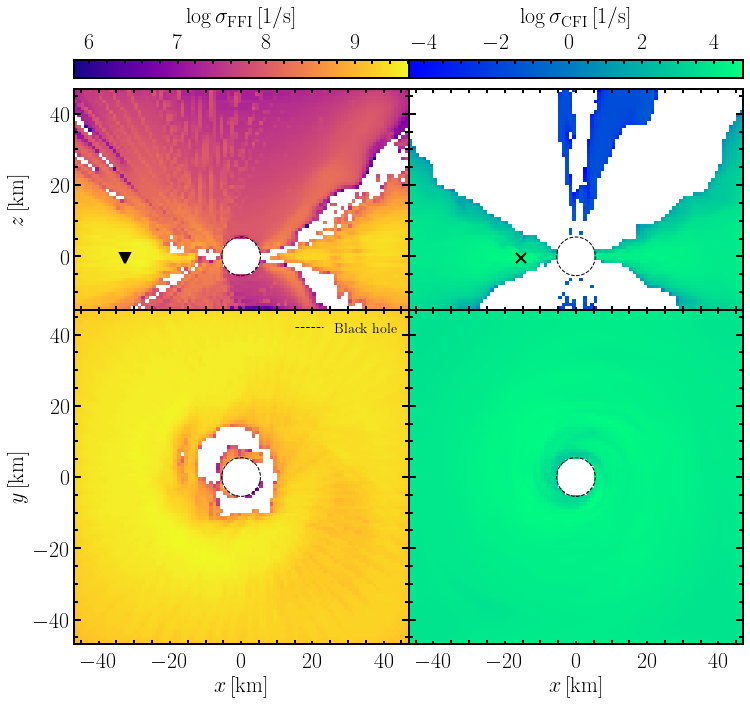

In [4]:
# profile slices
temp_slice_up  = np.array(xy_z_invsec_ffi)
ye_slice_up    = np.array(xy_z_invsec_cfi)
temp_slice_low = np.array(xz_z_invsec_ffi)
ye_slice_low   = np.array(xz_z_invsec_cfi)

xup = np.array(xy_x_km_ffi)
yup = np.array(xy_y_km_ffi)
xlow = np.array(xz_x_km_ffi)
ylow = np.array(xz_y_km_ffi)

# color bar limits
temp_max = np.max([np.nanmax(temp_slice_low), np.nanmax(temp_slice_up)])
temp_min = np.min([np.nanmin(temp_slice_low), np.nanmin(temp_slice_up)])
ye_max = np.max([np.nanmax(ye_slice_low), np.nanmax(ye_slice_up)])
ye_min = np.min([np.nanmin(ye_slice_low), np.nanmin(ye_slice_up)])

ffi_1506_max = temp_max
ffi_1506_min = temp_min

xmid = 96 / 2 # km
ymid = 96 / 2
zmid = 32 / 2 # km

# create 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=-0.19)
fig.align_labels()

import mpl_toolkits

# colorbars
cmap_1 = 'plasma'
norm = mpl.colors.Normalize(vmin=temp_min, vmax=temp_max)
sm = mpl.cm.ScalarMappable(cmap=cmap_1, norm=norm)
sm.set_array([])  # Required for ScalarMappable even if unused
divider = mpl_toolkits.axes_grid1.make_axes_locatable(axes[0,0])
cax = divider.append_axes("top", size="8%", pad=0.15)  # <-- Increase pad value to move colorbar up
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.ax.tick_params(which="both",direction="in")
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator())
cbar.set_label(r"$\log \sigma_{\mathrm{FFI}} \,[1/\mathrm{s}]$", labelpad=10)
cax.xaxis.set_major_locator(MultipleLocator(1))

cmap_2 = 'winter'
norm = mpl.colors.Normalize(vmin=ye_min, vmax=ye_max)
sm = mpl.cm.ScalarMappable(cmap=cmap_2, norm=norm)
sm.set_array([])  # Required for ScalarMappable even if unused
divider = mpl_toolkits.axes_grid1.make_axes_locatable(axes[0,1])
cax = divider.append_axes("top", size="8%", pad=0.15)  # <-- Increase pad value here too
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.ax.tick_params(which="both",direction="in")
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator())
cbar.set_label(r"$\log \sigma_{\mathrm{CFI}} \,[1/\mathrm{s}]$", labelpad=10)

# set axis labels
for ax in axes[-1,:]:
    ax.set_xlabel(r'$x\,[\mathrm{km}]$')
axes[0,0].set_ylabel(r'$z\,[\mathrm{km}]$')
axes[1,0].set_ylabel(r'$y\,[\mathrm{km}]$')
# remove xtick labels on all but the bottom row
for ax in axes[:-1,:].flatten():
    for label in ax.get_xticklabels():
        label.set_visible(False) 
for ax in axes[:,1:].flatten():
    for label in ax.get_yticklabels():
        label.set_visible(False)

for ax in axes.flat:
    ax.set_aspect('equal')
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_major_locator(MultipleLocator(20))
    # ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.minorticks_on()
    # pf.apply_custom_settings(ax, False)

# mask out the black hole region
axes[0,0].pcolormesh(xlow-xmid, ylow-zmid, temp_slice_low, shading='auto', cmap=cmap_1, vmin=temp_min, vmax=temp_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,0].add_patch(circle_bh)

ffi_x, ffi_y, ffi_z = 15.5, 48.5, 15.5
axes[0,0].plot(ffi_x - xmid, ffi_z - zmid, marker='v', color='k', markersize=10, mec='k', linestyle='none', mew=2)
# axes[1,0].plot(ffi_x - xmid, ffi_y - ymid, marker='v', color='k', markersize=10, mec='k', linestyle='none', mew=2)

cfi_x, cfi_y, cfi_z = 32.5, 48.5, 15.5
axes[0,1].plot(cfi_x - xmid, cfi_z - zmid, marker='x', color='k', markersize=10, mec='k', linestyle='none', mew=2)
# axes[1,1].plot(cfi_x - xmid, cfi_y - ymid, marker='x', color='k', markersize=10, mec='k', linestyle='none', mew=2)

axes[1,0].pcolormesh(xup-xmid , yup-ymid , temp_slice_up , shading='auto', cmap=cmap_1, vmin=temp_min, vmax=temp_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,0].add_patch(circle_bh)
# Add legend for black hole horizon
legend_circle = Line2D([0], [0], color='k', linestyle='dashed', linewidth=1, label='Black hole')
axes[1,0].legend(handles=[legend_circle], loc='upper right', frameon=False, fontsize=14)

axes[0,1].pcolormesh(xlow-xmid, ylow-zmid, ye_slice_low  , shading='auto', cmap=cmap_2, vmin=ye_min  , vmax=ye_max  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,1].add_patch(circle_bh)

axes[1,1].pcolormesh(xup-xmid , yup-ymid , ye_slice_up   , shading='auto', cmap=cmap_2, vmin=ye_min  , vmax=ye_max  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,1].add_patch(circle_bh)

plt.savefig('plots/global_instabilities.png', bbox_inches='tight')



### Reading Debraj CFI data

In [5]:
###########################################################
# Reading Debraj CFI multi-energy LSA data

equator_csv = here / 'erick_z16_multi_all.csv'
polar_csv = here / 'erick_y48_multi_all.csv'

cfi_equator_df = pd.read_csv(equator_csv)
cfi_polar_df = pd.read_csv(polar_csv)

ix_equator = np.array(cfi_equator_df['ix'])
iy_equator = np.array(cfi_equator_df['iy'])
omega_equator = np.array(cfi_equator_df['omega_imag_cm^-1'])
succeded_equator = np.array(cfi_equator_df['success'])
omega_ME_equator_mesh = np.zeros_like(xup) * np.nan
for n,i,j in zip(np.arange(len(ix_equator)) ,ix_equator, iy_equator):
    if i>0 and i<95 and j>0 and j<95 and succeded_equator[n]:
        omega_ME_equator_mesh[i-1,j-1] = omega_equator[n]    
omega_ME_equator_mesh_negative = omega_ME_equator_mesh <= 0
omega_ME_equator_mesh[omega_ME_equator_mesh_negative] = np.nan
omega_ME_equator_mesh_inv_s = omega_ME_equator_mesh * pc.PhysConst.c  # convert from cm^-1 to s^-1
log_omega_ME_equator_mesh = np.log10(omega_ME_equator_mesh_inv_s)

ix_polar = np.array(cfi_polar_df['ix'])
iz_polar = np.array(cfi_polar_df['iz'])
omega_polar = np.array(cfi_polar_df['omega_imag_cm^-1'])
succeded_polar = np.array(cfi_polar_df['success'])
omega_ME_polar_mesh = np.zeros_like(xlow) * np.nan
for n,i,j in zip(np.arange(len(ix_polar)) ,ix_polar, iz_polar):
    if i>0 and i<95 and j>0 and j<63 and succeded_polar[n]:
        omega_ME_polar_mesh[i-1,j-1] = omega_polar[n]
omega_ME_polar_mesh_negative = omega_ME_polar_mesh <= 0
omega_ME_polar_mesh[omega_ME_polar_mesh_negative] = np.nan
omega_ME_polar_mesh_inv_s = omega_ME_polar_mesh * pc.PhysConst.c  # convert from cm^-1 to s^-1
log_omega_ME_polar_mesh = np.log10(omega_ME_polar_mesh_inv_s)

###########################################################
# Reading Debraj CFI monocromatic LSA data

equator_csv = here / 'erick_z16_monoB_all.csv'
polar_csv = here / 'erick_y48_monoB_all.csv'

cfi_equator_df = pd.read_csv(equator_csv)
cfi_polar_df = pd.read_csv(polar_csv)

ix_equator = np.array(cfi_equator_df['ix'])
iy_equator = np.array(cfi_equator_df['iy'])
omega_equator = np.array(cfi_equator_df['omega_imag_cm^-1'])
succeded_equator = np.array(cfi_equator_df['success'])
omega_CFI_mono_equator_mesh = np.zeros_like(xup) * np.nan
for n,i,j in zip(np.arange(len(ix_equator)) ,ix_equator, iy_equator):
    if i>0 and i<95 and j>0 and j<95 and succeded_equator[n]:
        omega_CFI_mono_equator_mesh[i-1,j-1] = omega_equator[n]    
omega_CFI_mono_equator_mesh_negative = omega_CFI_mono_equator_mesh <= 0
omega_CFI_mono_equator_mesh[omega_CFI_mono_equator_mesh_negative] = np.nan
omega_CFI_mono_equator_mesh_inv_s = omega_CFI_mono_equator_mesh * pc.PhysConst.c  # convert from cm^-1 to s^-1
log_omega_CFI_mono_equator_mesh = np.log10(omega_CFI_mono_equator_mesh_inv_s)

ix_polar = np.array(cfi_polar_df['ix'])
iz_polar = np.array(cfi_polar_df['iz'])
omega_polar = np.array(cfi_polar_df['omega_imag_cm^-1'])
succeded_polar = np.array(cfi_polar_df['success'])
omega_CFI_mono_polar_mesh = np.zeros_like(xlow) * np.nan
for n,i,j in zip(np.arange(len(ix_polar)) ,ix_polar, iz_polar):
    if i>0 and i<95 and j>0 and j<63 and succeded_polar[n]:
        omega_CFI_mono_polar_mesh[i-1,j-1] = omega_polar[n]
omega_CFI_mono_polar_mesh_negative = omega_CFI_mono_polar_mesh <= 0
omega_CFI_mono_polar_mesh[omega_CFI_mono_polar_mesh_negative] = np.nan
omega_CFI_mono_polar_mesh_inv_s = omega_CFI_mono_polar_mesh * pc.PhysConst.c  # convert from cm^-1 to s^-1
log_omega_CFI_mono_polar_mesh = np.log10(omega_CFI_mono_polar_mesh_inv_s)

### Calculation data of where each instability dominates

In [6]:
# profile slices
log_ffi_equator_inv_s = np.array(xy_z_invsec_ffi)
log_ffi_polar_inv_s = np.array(xz_z_invsec_ffi)

nans_in_log_ffi_equator = np.isnan(log_ffi_equator_inv_s)
nans_in_log_ffi_polar = np.isnan(log_ffi_polar_inv_s)
nan_in_log_cfi_me_equator = np.isnan(log_omega_ME_equator_mesh)
nan_in_log_cfi_me_polar = np.isnan(log_omega_ME_polar_mesh)

log_ffi_equator_inv_s_forcomparison = log_ffi_equator_inv_s.copy()
log_ffi_equator_inv_s_forcomparison[nans_in_log_ffi_equator] = -1
log_ffi_polar_inv_s_forcomparison = log_ffi_polar_inv_s.copy()
log_ffi_polar_inv_s_forcomparison[nans_in_log_ffi_polar] = -1
log_omega_ME_equator_mesh_forcomparison = log_omega_ME_equator_mesh.copy()
log_omega_ME_equator_mesh_forcomparison[nan_in_log_cfi_me_equator] = -1
log_omega_ME_polar_mesh_forcomparison = log_omega_ME_polar_mesh.copy()
log_omega_ME_polar_mesh_forcomparison[nan_in_log_cfi_me_polar] = -1

no_instability_regions_equator = (log_ffi_equator_inv_s_forcomparison == -1) & (log_omega_ME_equator_mesh_forcomparison == -1)
no_instability_regions_polar = (log_ffi_polar_inv_s_forcomparison == -1) & (log_omega_ME_polar_mesh_forcomparison == -1)

# instability domination
instability_domination_equator = np.zeros_like(log_ffi_equator_inv_s) * np.nan
ffi_dominates_equator = log_ffi_equator_inv_s_forcomparison > log_omega_ME_equator_mesh_forcomparison
instability_domination_equator[ffi_dominates_equator] = -0.5  # FFI dominates
cfi_dominates_equator = log_omega_ME_equator_mesh_forcomparison >= log_ffi_equator_inv_s_forcomparison
instability_domination_equator[cfi_dominates_equator] = 0.5  # CFI dominates
instability_domination_equator[no_instability_regions_equator] = np.nan  # No instability

instability_domination_polar = np.zeros_like(log_ffi_polar_inv_s) * np.nan
ffi_dominates_polar = log_ffi_polar_inv_s_forcomparison > log_omega_ME_polar_mesh_forcomparison
instability_domination_polar[ffi_dominates_polar] = -0.5  # FFI dominates
cfi_dominates_polar = log_omega_ME_polar_mesh_forcomparison >= log_ffi_polar_inv_s_forcomparison
instability_domination_polar[cfi_dominates_polar] = 0.5  # CFI dominates
instability_domination_polar[no_instability_regions_polar] = np.nan  # No instability

### Plotting growth rate map of FFI, CFI mono, CFI multi and where each of them dominates

total_max = 9.608522618213616
total_min = 1.1


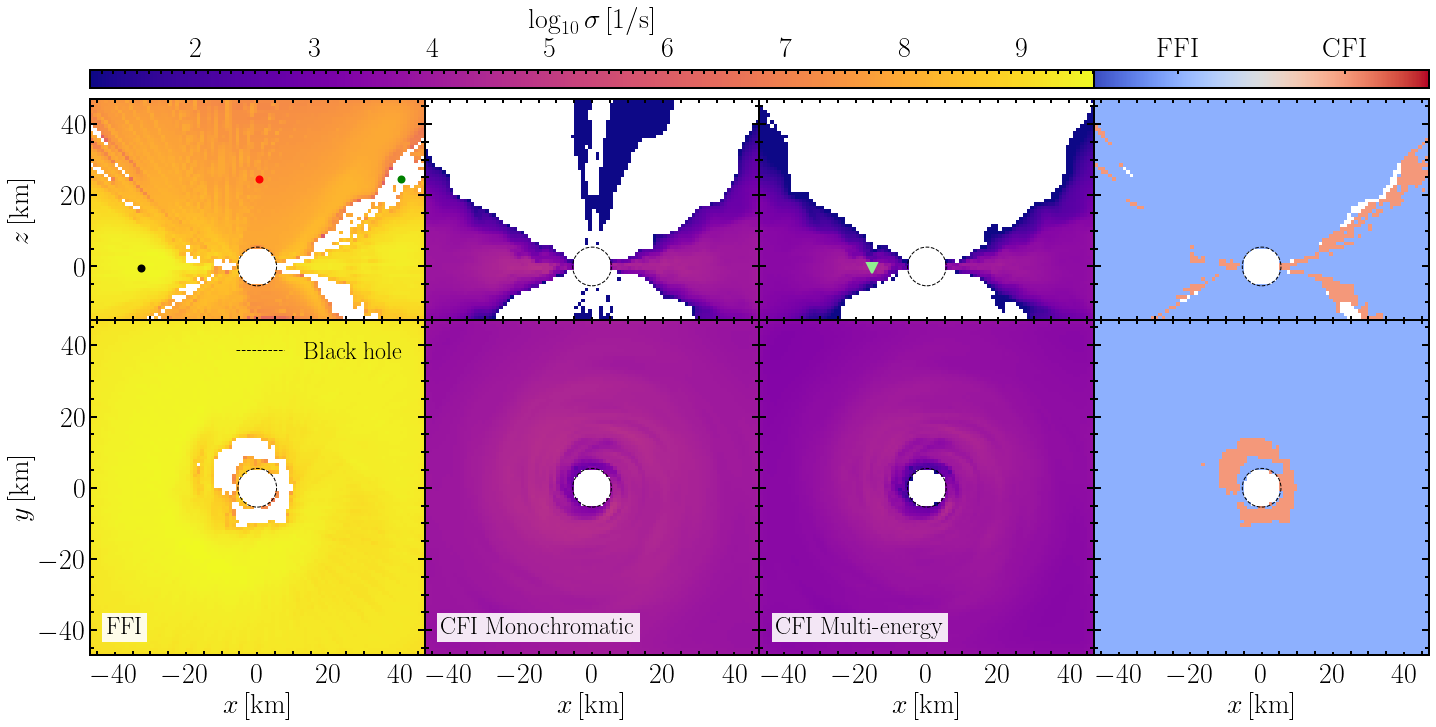

In [12]:
xup = np.array(xy_x_km_ffi)
yup = np.array(xy_y_km_ffi)
xlow = np.array(xz_x_km_ffi)
ylow = np.array(xz_y_km_ffi)

# color bar limits
log_ffi_max    = np.max([np.nanmax(log_ffi_polar_inv_s),     np.nanmax(log_ffi_equator_inv_s)])
log_ffi_min    = np.min([np.nanmin(log_ffi_polar_inv_s),     np.nanmin(log_ffi_equator_inv_s)])
log_cfi_mc_max = np.max([np.nanmax(log_omega_CFI_mono_polar_mesh),     np.nanmax(log_omega_CFI_mono_equator_mesh)])
log_cfi_mc_min = np.min([np.nanmin(log_omega_CFI_mono_polar_mesh),     np.nanmin(log_omega_CFI_mono_equator_mesh)])
log_cfi_me_max = np.max([np.nanmax(log_omega_ME_polar_mesh), np.nanmax(log_omega_ME_equator_mesh)])
log_cfi_me_min = np.min([np.nanmin(log_omega_ME_polar_mesh), np.nanmin(log_omega_ME_equator_mesh)])

total_max = np.max([log_ffi_max, log_cfi_mc_max, log_cfi_me_max])
total_min = np.min([log_ffi_min, log_cfi_mc_min, log_cfi_me_min])

# total_max = 10
total_min = 1.1

print(f"total_max = {total_max}")
print(f"total_min = {total_min}")

xmid = 96 / 2 # km
ymid = 96 / 2
zmid = 32 / 2 # km

#############################################################################
# create figure

fig, axes = plt.subplots(2, 4, figsize=(24, 12), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=-0.256)
fig.align_labels()

cmap_1 = 'plasma'
norm = mpl.colors.Normalize(vmin=total_min, vmax=total_max)
sm = mpl.cm.ScalarMappable(cmap=cmap_1, norm=norm)
sm.set_array([])
bbox_left = axes[0,0].get_position()
bbox_right = axes[0,2].get_position()
cax_height = 0.02
cax_pad = 0.03
cax = fig.add_axes([bbox_left.x0,
                    bbox_left.y1*0.88 + cax_pad,
                    bbox_right.x1 - bbox_left.x0,
                    cax_height])
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.ax.tick_params(which="both", direction="in", labelsize=28)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_minor_locator(MultipleLocator(0.1))
cbar.ax.xaxis.set_major_locator(MultipleLocator(1))
cbar.set_label(r"$\log_{10} \sigma \,[1/\mathrm{s}]$", labelpad=10, fontsize=28)

cmap_2 = 'coolwarm'
instability_norm = mpl.colors.Normalize(vmin=-1, vmax=1)
instability_sm = mpl.cm.ScalarMappable(cmap=cmap_2, norm=instability_norm)
instability_sm.set_array([])
bbox_left = axes[0,3].get_position()
bbox_right = axes[0,3].get_position()
cax_height = 0.02
cax_pad = 0.03
cax = fig.add_axes([bbox_left.x0,
                    bbox_left.y1 * 0.88 + cax_pad,
                    bbox_right.x1 - bbox_left.x0,
                    cax_height])
cbar = plt.colorbar(instability_sm, cax=cax, orientation='horizontal')
cbar.ax.tick_params(which="both", direction="in", labelsize=28)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.set_ticks([-1, -0.5, 0.5, 1])
cbar.set_ticklabels(['', 'FFI', 'CFI', ''])
cbar.ax.xaxis.set_minor_locator(mpl.ticker.NullLocator())

# cbar.set_label('Instability domination', labelpad=10)

# set axis labels
for ax in axes[-1,:]:
    ax.set_xlabel(r'$x\,[\mathrm{km}]$', fontsize=28)
axes[0,0].set_ylabel(r'$z\,[\mathrm{km}]$', fontsize=28)
axes[1,0].set_ylabel(r'$y\,[\mathrm{km}]$', fontsize=28)
# remove xtick labels on all but the bottom row
for ax in axes[:-1,:].flatten():
    for label in ax.get_xticklabels():
        label.set_visible(False) 
for ax in axes[:,1:].flatten():
    for label in ax.get_yticklabels():
        label.set_visible(False)

for ax in axes.flat:
    ax.set_aspect('equal')
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=28)
    # pf.apply_custom_settings(ax, False)

# FFI
axes[0,0].pcolormesh(xlow-xmid, ylow-zmid, log_ffi_polar_inv_s, shading='auto', cmap=cmap_1, vmin=total_min, vmax=total_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,0].add_patch(circle_bh)
ffi_x, ffi_y, ffi_z = 15.5, 48.5, 15.5
axes[0,0].plot(ffi_x - xmid, ffi_z - zmid, marker='o', color='k', markersize=6, mec='k', linestyle='none', mew=2)
ffi_x, ffi_y, ffi_z = 48.5, 48.5, 40.5
axes[0,0].plot(ffi_x - xmid, ffi_z - zmid, marker='o', color='red', markersize=6, mec='red', linestyle='none', mew=2)
ffi_x, ffi_y, ffi_z = 88.5, 48.5, 40.5
axes[0,0].plot(ffi_x - xmid, ffi_z - zmid, marker='o', color='green', markersize=6, mec='green', linestyle='none', mew=2)
axes[1,0].pcolormesh(xup-xmid , yup-ymid , log_ffi_equator_inv_s , shading='auto', cmap=cmap_1, vmin=total_min, vmax=total_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,0].add_patch(circle_bh)
legend_circle = Line2D([0], [0], color='k', linestyle='dashed', linewidth=1, label='Black hole')
axes[1,0].legend(handles=[legend_circle], loc='upper right', frameon=False, fontsize=24)
axes[1,0].text(0.05, 0.05, 'FFI', transform=axes[1,0].transAxes, fontsize=24, ha='left', va='bottom', bbox=dict(facecolor='white', edgecolor='none', pad=4, alpha=0.9))

# CFI MONOCHROMATIC
axes[0,1].pcolormesh(xlow-xmid, ylow-zmid, log_omega_CFI_mono_polar_mesh, shading='auto', cmap=cmap_1, vmin=total_min  , vmax=total_max  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,1].add_patch(circle_bh)
axes[1,1].pcolormesh(xup-xmid , yup-ymid , log_omega_CFI_mono_equator_mesh, shading='auto', cmap=cmap_1, vmin=total_min  , vmax=total_max  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,1].add_patch(circle_bh)
axes[1,1].text(0.05, 0.05, 'CFI Monochromatic', transform=axes[1,1].transAxes, fontsize=24, ha='left', va='bottom', bbox=dict(facecolor='white', edgecolor='none', pad=4, alpha=0.9))

# CFI MULTI-ENERGY
axes[0,2].pcolormesh(xlow-xmid, ylow-zmid, log_omega_ME_polar_mesh, shading='auto', cmap=cmap_1, vmin=total_min, vmax=total_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,2].add_patch(circle_bh)
cfi_x, cfi_y, cfi_z = 32.5, 48.5, 15.5
axes[0,2].plot(cfi_x - xmid, cfi_z - zmid, marker='v', color='lightgreen', markersize=10, mec='lightgreen', linestyle='none', mew=2)
axes[1,2].pcolormesh(xup-xmid , yup-ymid , log_omega_ME_equator_mesh, shading='auto', cmap=cmap_1, vmin=total_min, vmax=total_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,2].add_patch(circle_bh)
axes[1,2].text(0.05, 0.05, 'CFI Multi-energy', transform=axes[1,2].transAxes, fontsize=24, ha='left', va='bottom', bbox=dict(facecolor='white', edgecolor='none', pad=4, alpha=0.9))

# Instability domination
axes[0,3].pcolormesh(xlow-xmid, ylow-zmid, instability_domination_polar  , shading='auto', cmap=cmap_2, vmin=-1  , vmax=1  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,3].add_patch(circle_bh)
axes[1,3].pcolormesh(xup-xmid , yup-ymid , instability_domination_equator   , shading='auto', cmap=cmap_2, vmin=-1  , vmax=1  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,3].add_patch(circle_bh)

plt.savefig('plots/global_instabilities.png', bbox_inches='tight', dpi=500)

f_nu_e maximum at 8.0097 MeV
f_nubar_e maximum at 8.0097 MeV
f_nu_x maximum at 1.0 MeV
feq_nu_e maximum at 1.0 MeV
feq_nubar_e maximum at 1.0 MeV
feq_nu_x maximum at 1.0 MeV
energybinsMeV = [1.0, 3.0, 5.2382, 8.0097, 11.442, 15.691, 20.953, 27.468, 35.536, 45.525, 57.895, 73.212, 92.178]
f_nu_e = [0.006521702881797871, 0.020073470976539026, 0.03484658072278011, 0.03965698261033323, 0.02751185667432394, 0.011607702312938681, 0.003158601098696683, 0.0005733842698907312, 6.747931038641904e-05, 4.759529082699893e-06, 1.7909033181414476e-07, 3.0889951802233437e-09, 2.0201687097226764e-11]
f_nubar_e = [0.0008266765812236383, 0.0020606930415842904, 0.006136076070410455, 0.008123901263370346, 0.006917333469660352, 0.004069698424592733, 0.0016455337701198184, 0.00043876723841825493, 7.217538618235897e-05, 6.674620204193405e-06, 3.0766583031388274e-07, 6.093104719325275e-09, 4.3427656496137066e-11]
f_nu_x = [7.56497963607975e-05, 7.474592240119204e-05, 7.108862210033428e-05, 5.6367780201784625e-

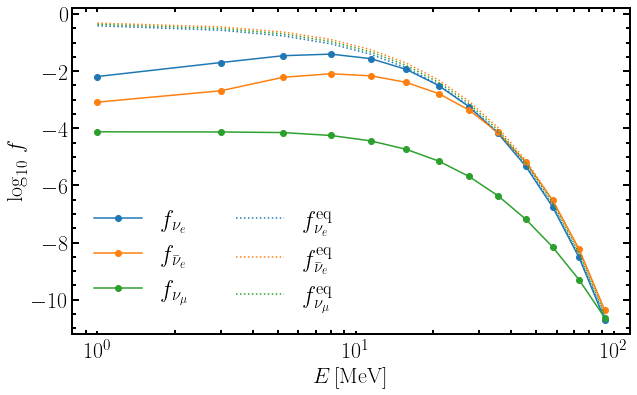

In [8]:
energybinsMeV = [1.0, 3.0, 5.2382, 8.0097, 11.442, 15.691, 20.953, 27.468, 35.536, 45.525, 57.895, 73.212, 92.178]
f_nu_e = [0.006521702881797871, 0.020073470976539026, 0.03484658072278011, 0.03965698261033323, 0.02751185667432394, 0.011607702312938681, 0.003158601098696683, 0.0005733842698907312, 6.747931038641904e-05, 4.759529082699893e-06, 1.7909033181414476e-07, 3.0889951802233437e-09, 2.0201687097226764e-11]
f_nubar_e = [0.0008266765812236383, 0.0020606930415842904, 0.006136076070410455, 0.008123901263370346, 0.006917333469660352, 0.004069698424592733, 0.0016455337701198184, 0.00043876723841825493, 7.217538618235897e-05, 6.674620204193405e-06, 3.0766583031388274e-07, 6.093104719325275e-09, 4.3427656496137066e-11]
f_nu_x = [7.56497963607975e-05, 7.474592240119204e-05, 7.108862210033428e-05, 5.6367780201784625e-05, 3.639004905522398e-05, 1.8462764440419687e-05, 7.170408801806545e-06, 2.0754930776738156e-06, 4.4008978218765684e-07, 6.669263165682613e-08, 7.0687045361239646e-09, 5.08765057270609e-10, 2.353213998752438e-11]
feq_nu_e = [0.38779041356182936, 0.27250827875021494, 0.17224153032476175, 0.09130604563658595, 0.03919109191965831, 0.013185337513924523, 0.0033431129574536117, 0.0006055625354973532, 7.278674983430775e-05, 5.27970863082672e-06, 2.048960058438477e-07, 3.6667627949045053e-09, 2.516407424471708e-11]
feq_nubar_e = [0.48282818133551053, 0.35570882710799123, 0.23470565870571045, 0.1289925379160776, 0.05670959870084598, 0.019312875768383034, 0.0049195388384934745, 0.0008922677722069464, 0.0001072749112475792, 7.781614023131328e-06, 3.0199118515001655e-07, 5.4043520425354466e-09, 3.7088713910433024e-11]
feq_nu_x = [0.43470944727126204, 0.3126012900453216, 0.2016721507869382, 0.10872379785240406, 0.047183486234802674, 0.01596238441268892, 0.004055746637536582, 0.0007350774860911019, 8.836412259007845e-05, 6.409732026886588e-06, 2.4875045370427275e-07, 4.451570172811366e-09, 3.05500106462221e-11]

energy_array = np.asarray(energybinsMeV)
distributions = {
    'f_nu_e': np.asarray(f_nu_e),
    'f_nubar_e': np.asarray(f_nubar_e),
    'f_nu_x': np.asarray(f_nu_x),
    'feq_nu_e': np.asarray(feq_nu_e),
    'feq_nubar_e': np.asarray(feq_nubar_e),
    'feq_nu_x': np.asarray(feq_nu_x),
}
peak_energies = {name: energy_array[np.argmax(vals)] for name, vals in distributions.items()}
for name, energy in peak_energies.items():
    print(f"{name} maximum at {energy} MeV")

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(energybinsMeV, np.log10(f_nu_e),    marker='o', label=r'$f_{     \nu_e}$')
ax.plot(energybinsMeV, np.log10(f_nubar_e), marker='o', label=r'$f_{\bar{\nu}_e}$')
ax.plot(energybinsMeV, np.log10(f_nu_x),    marker='o', label=r'$f_{     \nu_\mu}$')

ax.plot(energybinsMeV, np.log10(feq_nu_e),    marker='', label=r'$f_{     \nu_e}^{\mathrm{eq}}$',  color='C0', linestyle='dotted')
ax.plot(energybinsMeV, np.log10(feq_nubar_e), marker='', label=r'$f_{\bar{\nu}_e}^{\mathrm{eq}}$', color='C1', linestyle='dotted')
ax.plot(energybinsMeV, np.log10(feq_nu_x),    marker='', label=r'$f_{     \nu_\mu}^{\mathrm{eq}}$',  color='C2', linestyle='dotted')

print('energybinsMeV =', list(energybinsMeV))
print('f_nu_e =', list(f_nu_e))
print('f_nubar_e =', list(f_nubar_e))
print('f_nu_x =', list(f_nu_x))
print('feq_nu_e =', list(feq_nu_e))
print('feq_nubar_e =', list(feq_nubar_e))
print('feq_nu_x =', list(feq_nu_x))

ax.set_xlabel(r'$E\,[\mathrm{MeV}]$')
ax.set_ylabel(r'$\log_{10} \, f$')
leg = ax.legend(framealpha=0.0, ncol=2, fontsize=24)
pf.apply_custom_settings(ax, leg, log_scale_y=False)
ax.set_xscale('log')
plt.savefig(f"plots/distribution_function.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)

In [9]:
with h5py.File(f'/home/erick/software/devscrpts/gw170817_paper_plots/92_ppEb_0.32ms_sigmaFFI_slices.h5', 'r') as f:

    xz_x_km_ffi_92 = np.array(f['xz_x_km'][:])
    xz_y_km_ffi_92 = np.array(f['xz_y_km'][:])
    xz_z_invsec_ffi_92 = np.array(f['xz_z_invsec'][:])

    xy_x_km_ffi_92 = np.array(f['xy_x_km'][:])
    xy_y_km_ffi_92 = np.array(f['xy_y_km'][:])
    xy_z_invsec_ffi_92 = np.array(f['xy_z_invsec'][:])

with h5py.File(f'/home/erick/software/devscrpts/gw170817_paper_plots/378_ppEb_0.32ms_sigmaFFI_slices.h5', 'r') as f:

    xz_x_km_ffi_378 = np.array(f['xz_x_km'][:])
    xz_y_km_ffi_378 = np.array(f['xz_y_km'][:])
    xz_z_invsec_ffi_378 = np.array(f['xz_z_invsec'][:])

    xy_x_km_ffi_378 = np.array(f['xy_x_km'][:])
    xy_y_km_ffi_378 = np.array(f['xy_y_km'][:])
    xy_z_invsec_ffi_378 = np.array(f['xy_z_invsec'][:])

with h5py.File(f'/home/erick/software/devscrpts/gw170817_paper_plots/hsr_92_ppEb_0.32ms_sigmaFFI_slices.h5', 'r') as f:

    xz_x_km_ffi_92_np = np.array(f['xz_x_km'][:])
    xz_y_km_ffi_92_np = np.array(f['xz_y_km'][:])
    xz_z_invsec_ffi_92_np = np.array(f['xz_z_invsec'][:])

    xy_x_km_ffi_92_np = np.array(f['xy_x_km'][:])
    xy_y_km_ffi_92_np = np.array(f['xy_y_km'][:])
    xy_z_invsec_ffi_92_np = np.array(f['xy_z_invsec'][:])

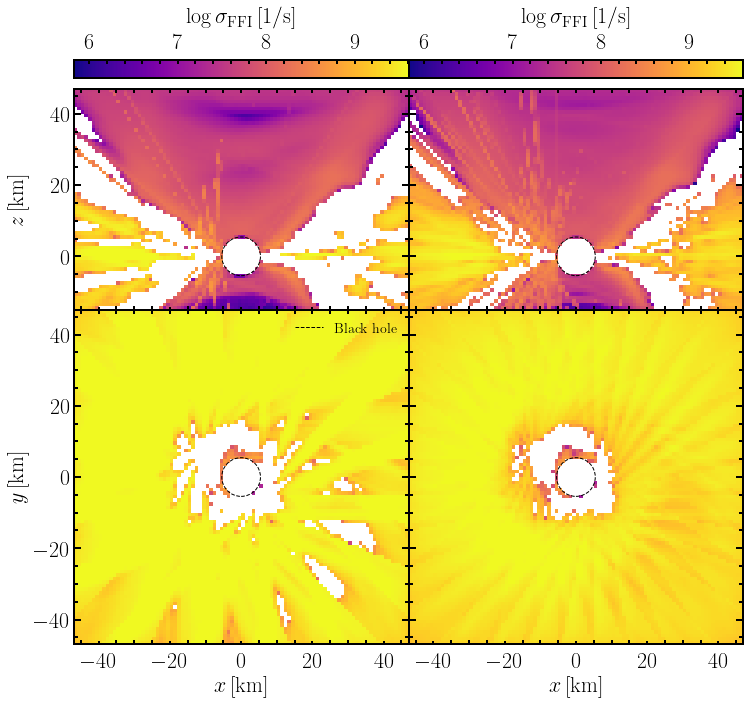

In [10]:
cmap = 'plasma'

# profile slices
temp_slice_up  = np.array(xy_z_invsec_ffi_92)
ye_slice_up    = np.array(xy_z_invsec_ffi_378)
temp_slice_low = np.array(xz_z_invsec_ffi_92)
ye_slice_low   = np.array(xz_z_invsec_ffi_378)

xup = np.array(xy_x_km_ffi_92)
yup = np.array(xy_y_km_ffi_92)
xlow = np.array(xz_x_km_ffi_92)
ylow = np.array(xz_y_km_ffi_92)

# color bar limits
temp_max = np.max([np.nanmax(temp_slice_low), np.nanmax(temp_slice_up)])
temp_min = np.min([np.nanmin(temp_slice_low), np.nanmin(temp_slice_up)])
ye_max = np.max([np.nanmax(ye_slice_low), np.nanmax(ye_slice_up)])
ye_min = np.min([np.nanmin(ye_slice_low), np.nanmin(ye_slice_up)])

temp_max = ffi_1506_max
temp_min = ffi_1506_min
ye_max = ffi_1506_max
ye_min = ffi_1506_min

xmid = 96 / 2 # km
ymid = 96 / 2
zmid = 32 / 2 # km

# create 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=-0.19)
fig.align_labels()

import mpl_toolkits

# colorbars
norm = mpl.colors.Normalize(vmin=temp_min, vmax=temp_max)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable even if unused
divider = mpl_toolkits.axes_grid1.make_axes_locatable(axes[0,0])
cax = divider.append_axes("top", size="8%", pad=0.15)  # <-- Increase pad value to move colorbar up
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.ax.tick_params(which="both",direction="in")
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator())
cbar.set_label(r"$\log \sigma_{\mathrm{FFI}} \,[1/\mathrm{s}]$", labelpad=10)
cax.xaxis.set_major_locator(MultipleLocator(1))

norm = mpl.colors.Normalize(vmin=ye_min, vmax=ye_max)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable even if unused
divider = mpl_toolkits.axes_grid1.make_axes_locatable(axes[0,1])
cax = divider.append_axes("top", size="8%", pad=0.15)  # <-- Increase pad value here too
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.ax.tick_params(which="both",direction="in")
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_minor_locator(AutoMinorLocator())
cbar.set_label(r"$\log \sigma_{\mathrm{FFI}} \,[1/\mathrm{s}]$", labelpad=10)

# set axis labels
for ax in axes[-1,:]:
    ax.set_xlabel(r'$x\,[\mathrm{km}]$')
axes[0,0].set_ylabel(r'$z\,[\mathrm{km}]$')
axes[1,0].set_ylabel(r'$y\,[\mathrm{km}]$')
# remove xtick labels on all but the bottom row
for ax in axes[:-1,:].flatten():
    for label in ax.get_xticklabels():
        label.set_visible(False) 
for ax in axes[:,1:].flatten():
    for label in ax.get_yticklabels():
        label.set_visible(False)

for ax in axes.flat:
    ax.set_aspect('equal')
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_major_locator(MultipleLocator(20))
    # ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.minorticks_on()
    # pf.apply_custom_settings(ax, False)

# mask out the black hole region
axes[0,0].pcolormesh(xlow-xmid, ylow-zmid, temp_slice_low, shading='auto', cmap=cmap, vmin=temp_min, vmax=temp_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,0].add_patch(circle_bh)

axes[1,0].pcolormesh(xup-xmid , yup-ymid , temp_slice_up , shading='auto', cmap=cmap, vmin=temp_min, vmax=temp_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,0].add_patch(circle_bh)
# Add legend for black hole horizon
legend_circle = Line2D([0], [0], color='k', linestyle='dashed', linewidth=1, label='Black hole')
axes[1,0].legend(handles=[legend_circle], loc='upper right', frameon=False, fontsize=14)

axes[0,1].pcolormesh(xlow-xmid, ylow-zmid, ye_slice_low  , shading='auto', cmap=cmap, vmin=ye_min  , vmax=ye_max  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,1].add_patch(circle_bh)

axes[1,1].pcolormesh(xup-xmid , yup-ymid , ye_slice_up   , shading='auto', cmap=cmap, vmin=ye_min  , vmax=ye_max  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,1].add_patch(circle_bh)

plt.savefig('plots/global_instabilities_92_378.png', bbox_inches='tight')

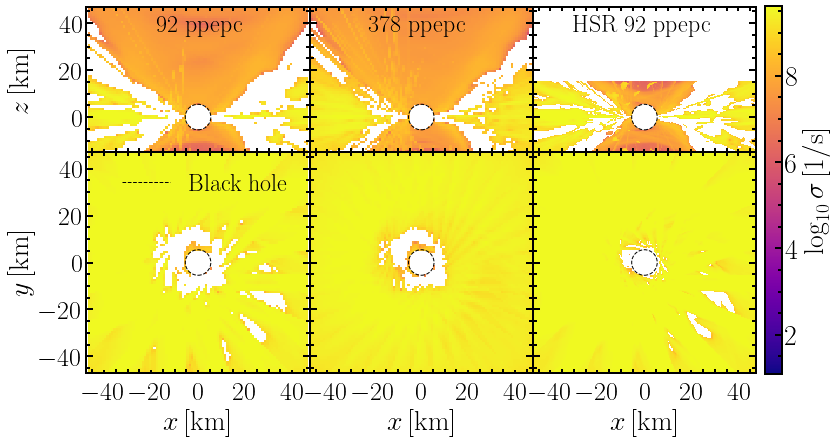

In [11]:
cmap = 'plasma'

total_max = 9.608522618213616
total_min = 1.1

xmid = 96 / 2 # km
ymid = 96 / 2
zmid = 32 / 2 # km

# create 2x2 figure
fig, axes = plt.subplots(2, 3, figsize=(12, 12), sharex=True, sharey=False)
plt.subplots_adjust(wspace=0, hspace=-0.61)
fig.align_labels()

import mpl_toolkits

# set axis labels
for ax in axes[-1,:]:
    ax.set_xlabel(r'$x\,[\mathrm{km}]$', fontsize=28)
axes[0,0].set_ylabel(r'$z\,[\mathrm{km}]$', fontsize=28)
axes[1,0].set_ylabel(r'$y\,[\mathrm{km}]$', fontsize=28)
# remove xtick labels on all but the bottom row
for ax in axes[:-1,:].flatten():
    for label in ax.get_xticklabels():
        label.set_visible(False) 
for ax in axes[:,1:].flatten():
    for label in ax.get_yticklabels():
        label.set_visible(False)

for ax in axes.flat:
    ax.set_aspect('equal')
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=26)
    # pf.apply_custom_settings(ax, False)

# 92 ppebpc new profile

axes[0,0].pcolormesh(xz_x_km_ffi_92-xmid, xz_y_km_ffi_92-zmid, xz_z_invsec_ffi_92, shading='auto', cmap=cmap, vmin=total_min, vmax=total_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,0].add_patch(circle_bh)
# axes[0,0].text(0.7, 0.96, r'$t = 0.32\,\mathrm{ms}$', transform=axes[0,0].transAxes, fontsize=18, ha='right', va='top')
axes[0,0].text(0.7, 0.94, r'92 ppepc', transform=axes[0,0].transAxes, fontsize=24, ha='right', va='top')

axes[1,0].pcolormesh(xy_x_km_ffi_92-xmid, xy_y_km_ffi_92-ymid, xy_z_invsec_ffi_92, shading='auto', cmap=cmap, vmin=total_min, vmax=total_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,0].add_patch(circle_bh)
legend_circle = Line2D([0], [0], color='k', linestyle='dashed', linewidth=1, label='Black hole')
axes[1,0].legend(handles=[legend_circle], loc='upper right', frameon=False, fontsize=24)

# 374ppebpc new profile

axes[0,1].pcolormesh(xz_x_km_ffi_378-xmid, xz_y_km_ffi_378-zmid, xz_z_invsec_ffi_378, shading='auto', cmap=cmap, vmin=total_min  , vmax=total_max  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[0,1].add_patch(circle_bh)
# axes[0,1].text(0.7, 0.96, r'$t = 0.32\,\mathrm{ms}$', transform=axes[0,1].transAxes, fontsize=18, ha='right', va='top')
axes[0,1].text(0.7, 0.94, r'378 ppepc', transform=axes[0,1].transAxes, fontsize=24, ha='right', va='top')
    
axes[1,1].pcolormesh(xy_x_km_ffi_378-xmid, xy_y_km_ffi_378-ymid, xy_z_invsec_ffi_378   , shading='auto', cmap=cmap, vmin=total_min  , vmax=total_max  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,1].add_patch(circle_bh)

# 92ppebpc new profile

axes[0,2].pcolormesh(xz_x_km_ffi_92_np-xmid, xz_y_km_ffi_92_np-zmid, xz_z_invsec_ffi_92_np,
                     shading='auto', cmap=cmap, vmin=total_min, vmax=total_max)
circle_bh = plt.Circle((bh_x[0]-xmid, bh_z[0]-zmid), bh_r[0], color='k', fill=False,
                       linestyle='dashed', linewidth=1)
axes[0,2].add_patch(circle_bh)
axes[0,2].set_ylim(-15, 47)
# axes[0,2].text(0.7, 0.96, r'$t = 0.31\,\mathrm{ms}$', transform=axes[0,2].transAxes, fontsize=18, ha='right', va='top')
axes[0,2].text(0.8, 0.94, r'HSR 92 ppepc', transform=axes[0,2].transAxes, fontsize=24, ha='right', va='top')

axes[1,2].pcolormesh(xy_x_km_ffi_92_np-xmid, xy_y_km_ffi_92_np-ymid, xy_z_invsec_ffi_92_np, shading='auto', cmap=cmap, vmin=total_min  , vmax=total_max  )
circle_bh = plt.Circle((bh_x[0]-xmid, bh_y[0]-ymid), bh_r[0], color='k', fill=False, linestyle='dashed', linewidth=1)
axes[1,2].add_patch(circle_bh)
axes[1,2].set_ylim(-47, 47)

# colorbar

norm = mpl.colors.Normalize(vmin=total_min, vmax=total_max)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.91, 0.268, 0.02, 0.425])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(r"$\log_{10} \sigma \,[1/\mathrm{s}]$", fontsize=28, color='black')
cbar.ax.tick_params(labelsize=28)
cbar.ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('plots/global_instabilities_92_378_and_92np.png', bbox_inches='tight', dpi=500)